#Analisi dei disastri aerei dal 1919 al 2023
La neonata IASS (International Alliance for Safe Skies) ti ha incaricato di svolgere un'accurata analisi di tutti gli incidenti aerei che si sono verificati dal 1919 al 2023.<br/>
A tale scopo ti mette a disposizione un set di dati in cui sono registrati quasi 25.000  incidenti con le seguenti informazioni<br/>
- date: data dell'incidente
- type: tipo del velivolo
- registration: codice di registrazione del velivolo
- operator: operatore del velivolo
- fatalities: numero di morti
- location: luogo dell'incidente
- country: nazione dell'incidente
- cat: categoria dell'incidente come descritto dal ASN
Utilizza i dati per portare alla luce, anche tramite grafici e visualizzazioni, utili insight.<br/>

**ESEMPI DI INSIGHT**<br/>
Questi sono esempi di domande alla quale puoi trovare risposta tramite i dati, non limitarti a queste ma svolgi un’analisi approfondita ponendoti ulteriori domande che pensi possano fornire insight utili<br/>
In quale nazione si sono verificati più incidenti?
- Gli incidenti avvengono più di frequente durante determinati giorni della settimana?
- Quali sono gli operatori più sicuri?
- Quale tipo di velivolo ha causato più morti?
- Come si sono evoluti gli incidenti dopo l'11 Settembre?

**BONUS**<br/>
Crea un cartogramma che rappresenti il numero di incidenti per nazione

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

csv_url="https://raw.githubusercontent.com/RomanRover/files/main/aviation-accidents.csv"
data=pd.read_csv(csv_url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%d-%b-%Y', errors='coerce')
data['year'] = pd.to_numeric(data['year'], errors='coerce')
data['fatalities'] = pd.to_numeric(data['fatalities'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          23408 non-null  datetime64[ns]
 1   type          23967 non-null  object        
 2   registration  22419 non-null  object        
 3   operator      23963 non-null  object        
 4   fatalities    19676 non-null  float64       
 5   location      23019 non-null  object        
 6   country       23967 non-null  object        
 7   cat           23967 non-null  object        
 8   year          23906 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 1.6+ MB


In [ ]:
data.head(10)

,date,type,registration,operator,fatalities,location,country,cat,year
0,NaT,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,NaN
1,NaT,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,NaN
2,NaT,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,NaN
3,NaT,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,NaN
4,NaT,Antonov An-12BP,CCCP-11815,Soviet AF,0.0,Massawa Airport ...,Eritrea,A1,NaN
5,NaT,Antonov An-12BP,CCCP-12172,Soviet AF,NaN,NaN,Russia,U1,NaN
6,NaT,Antonov An-2,CCCP-N574,"GUSMP, Directorate of Polar Aviation",NaN,unknown,Russia,A1,NaN
7,NaT,Antonov An-2,CCCP-01216,Aeroflot,0.0,Chita region,Russia,A2,NaN
8,NaT,Antonov An-24B,RA-47794,Russian AF,0.0,NaN,Russia,A1,NaN
9,NaT,Antonov An-26,01 red,Soviet AF,0.0,Orenburg Air Base,Russia,O1,NaN


In [ ]:
data.describe()

,fatalities,year
count,19676.000000,23906.000000
mean,6.135851,1973.814649
std,18.686195,25.394513
min,0.000000,1919.000000
25%,0.000000,1948.000000
50%,0.000000,1971.000000
75%,5.000000,1995.000000
max,520.000000,2023.000000


# Nazioni per n° di incidenti aerei

In [ ]:
grouped_countries = data.groupby(['country'])
top_20_countries=data['country'].value_counts().head(20)
print(top_20_countries)

USA                4377
Russia             1422
Unknown country     838
U.K.                837
Canada              826
India               700
Brazil              609
France              550
Germany             516
China               514
Colombia            457
Indonesia           437
Italy               353
Mexico              347
Myanmar             344
Netherlands         339
Vietnam             320
Australia           317
Philippines         303
P.N. Guinea         272
Name: country, dtype: int64


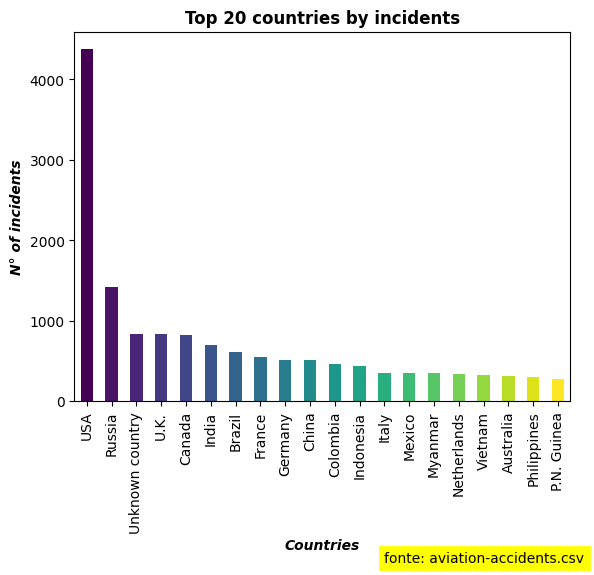

In [ ]:
colors = plt.get_cmap('viridis')
top_20_countries.plot(kind='bar', color=colors(np.linspace(0, 1, 20)))
plt.title("Top 20 countries by incidents",fontweight='bold')
plt.xlabel("Countries",fontweight='bold',fontstyle='italic')
plt.ylabel("N° of incidents",fontweight='bold',fontstyle='italic')
plt.text(12, -2000, "fonte: aviation-accidents.csv",size=10, bbox=dict(boxstyle="square,pad=0.3", lw=2,color='yellow'))
plt.show()

Dal grafico a barre si intuisce come il paese con più incidenti aerei sia di gran lunga gli USA, con oltre 4300 incidenti: più del triplo degli incidenti del secondo paese nel grafico (Russia).<br/>
Rilevante è anche il dato degli incidenti di cui non si sa la nazione dove sia avvenuto: per numerosità si collocano al terzo posto nel grafico.

# N° di incidenti aerei per giorno della settimana

In [ ]:
from datetime import datetime
import calendar
df = data.copy()
df = df.dropna(subset=['date'])
df['Day_of_Week'] = df['date'].dt.day_name()
day_of_week_counts = df['Day_of_Week'].value_counts()
print(day_of_week_counts)

Friday       3701
Thursday     3516
Wednesday    3491
Tuesday      3444
Monday       3317
Saturday     3186
Sunday       2753
Name: Day_of_Week, dtype: int64


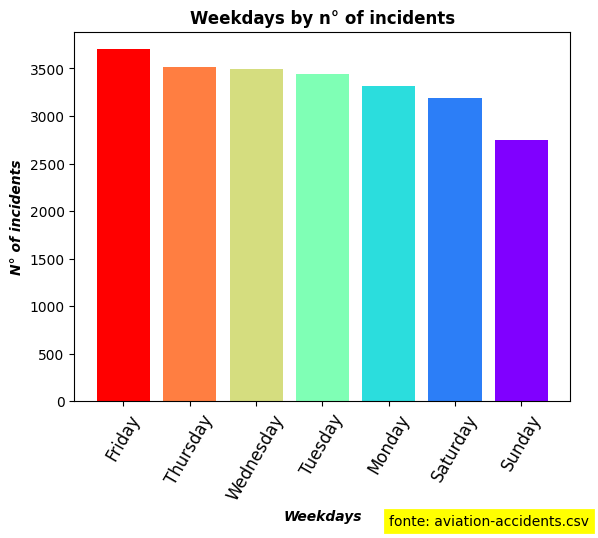

In [ ]:
labels = ['Friday','Thursday','Wednesday','Tuesday','Monday','Saturday','Sunday']
salary = [3701,3516,3491,3444,3317,3186,2753]
colors = plt.get_cmap('rainbow_r')
index = np.arange(len(labels))
plt.bar(index,salary,color=colors(np.linspace(0, 1, 7)))
plt.xticks(index, labels, fontsize=12, rotation=60)
plt.title("Weekdays by n° of incidents",fontweight='bold')
plt.xlabel("Weekdays",fontweight='bold',fontstyle='italic')
plt.ylabel("N° of incidents",fontweight='bold',fontstyle='italic')
plt.text(4, -1300, "fonte: aviation-accidents.csv",size=10, bbox=dict(boxstyle="square,pad=0.3", lw=2,color='yellow')) #parametri del box
plt.show()
del df

Dal grafico a barre si nota come gli incidenti avvengono più spesso in detterminati giorni e meno in altri:<br/> Venerdì è il giorno della settimana in cui avvengono più incidenti (oltre 3700 totali), mentre la Domenica è il giorno con meno incidenti (meno di 2800 totali).

# Lista di compagnie aeree per n° di incidenti e morti

Per quanto riguarda le compagnie aeree più sicure, abbiamo oltre 2400 compagnie nel database con un solo incidente senza vittime

In [ ]:
df=data.copy()
df['number_of_incidents'] = df.index
df = df.dropna(subset=['operator'])
df = df.dropna(subset=['fatalities'])
df['fatalities'] = df['fatalities'].replace(r'\D+', '', regex=True).astype(int)
operator_stats = df.groupby('operator').agg({
    'operator':'count',
    'fatalities': 'sum'
}).rename(columns={'operator':'number_of_incidents'})
safe_list = operator_stats[(operator_stats['number_of_incidents'] == 1) & (operator_stats['fatalities'] == 0)]
print(safe_list)

                        number_of_incidents  fatalities
operator                                               
, op.for UN                               1           0
1982-047 LLC                              1           0
2M Leasing                                1           0
40-Mile Air                               1           0
987 Investments                           1           0
...                                     ...         ...
easyJet Europe                            1           0
easyJet Switzerland                       1           0
interCaribbean Airways                    1           0
Ãrzteflugambulanz                        1           0
ÃLAG                                     1           0

[2465 rows x 2 columns]


Per quanto riguarda invece le compagnie aeree con più incidenti aerei e morti:

<ipython-input-24-4179f201d91d>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_20_operators.index, rotation=90, ha='center')


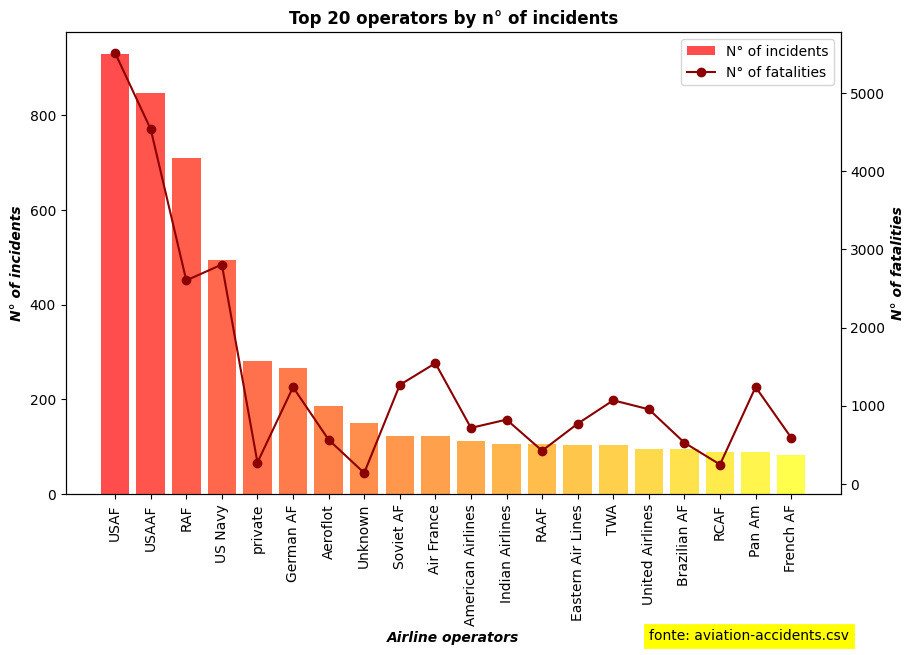

In [ ]:
top_operators = operator_stats.sort_values(by=['number_of_incidents','fatalities'], ascending=[False, False])
top_20_operators = top_operators.head(20)
colors = plt.get_cmap('autumn')
fig, ax1 = plt.subplots(figsize=(10, 6))
bars = ax1.bar(top_20_operators.index, top_20_operators['number_of_incidents'], color=colors(np.linspace(0, 1, 20)), alpha=0.7, label='N° of incidents')
ax1.set_xticklabels(top_20_operators.index, rotation=90, ha='center')
ax2 = ax1.twinx()
ax2.plot(top_20_operators.index, top_20_operators['fatalities'], color='darkred', marker='o', label='N° of fatalities')
ax1.set_xlabel('Airline operators',fontweight='bold',fontstyle='italic')
ax1.set_ylabel('N° of incidents', color='black',fontweight='bold',fontstyle='italic')
ax2.set_ylabel('N° of fatalities', color='black',fontweight='bold',fontstyle='italic')
plt.title('Top 20 operators by n° of incidents',fontweight='bold')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.text(15, -2000, "fonte: aviation-accidents.csv",size=10, bbox=dict(boxstyle="square,pad=0.3", lw=2,color='yellow'))
plt.show()
del df

In questo grafico misto, a linea e a barre, si può notare come USAF e USAAF siano gli operatori aerei sia con più morti che con più incidenti aerei.<br/> La diretta proporzionalità tra n° di incidenti e n° di morti non è così evidente dopo i primi valori del grafico.

# N° di morti per tipologia di aeroplano

In [ ]:
df = data.copy()
df['number_of_incidents'] = df.index
df = df.dropna(subset=['fatalities'])
df['fatalities'] = df['fatalities'].replace(r'\D+', '', regex=True).astype(int)
df = df.dropna(subset=['type'])
aircraft_fatalities = df.groupby('type').agg({'fatalities':'sum'})
aircraft_fatalities = aircraft_fatalities.sort_values(by='fatalities', ascending=False).reset_index()
print(aircraft_fatalities)

                            type  fatalities
0           Douglas C-47A (DC-3)        5689
1            Douglas C-47 (DC-3)        2619
2           Douglas C-47B (DC-3)        1994
3                Tupolev Tu-154M        1395
4                Ilyushin Il-18V        1356
...                          ...         ...
3077  Bristol 175 Britannia 308F           0
3078   Bristol 175 Britannia 302           0
3079   Bristol 175 Britannia 101           0
3080    Bristol 170 Wayfarer IIA           0
3081       DH-114 Riley Heron 2D           0

[3082 rows x 2 columns]


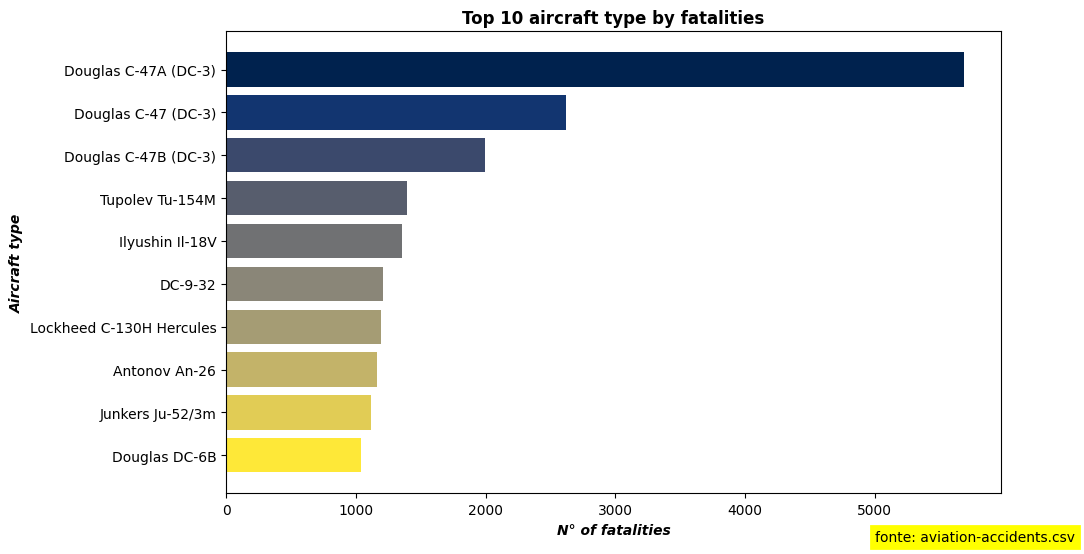

In [ ]:
top_10_types = aircraft_fatalities.head(10)
colors = plt.get_cmap('cividis')
plt.figure(figsize=(10, 6))
plt.barh(top_10_types['type'], top_10_types['fatalities'], color=colors(np.linspace(0, 1, 10)))
plt.title('Top 10 aircraft type by fatalities',fontweight='bold')
plt.xlabel('N° of fatalities',fontweight='bold',fontstyle='italic')
plt.ylabel('Aircraft type',fontweight='bold',fontstyle='italic')
plt.gca().invert_yaxis()
plt.text(5000, 11, "fonte: aviation-accidents.csv",size=10, bbox=dict(boxstyle="square,pad=0.3", lw=2,color='yellow'))
plt.show()
del df

Le tipologie di aeroplano che hanno causato più morti sono sicuramente i Douglas, tra i quali spicca il modello C-47A (DC-3) che ha causato più del doppio delle morti del secondo modello nel grafico, il C-47A (DC-3).

# N° di incidenti aerei e n° di morti per anno

**N° di incidenti aerei per anno:**

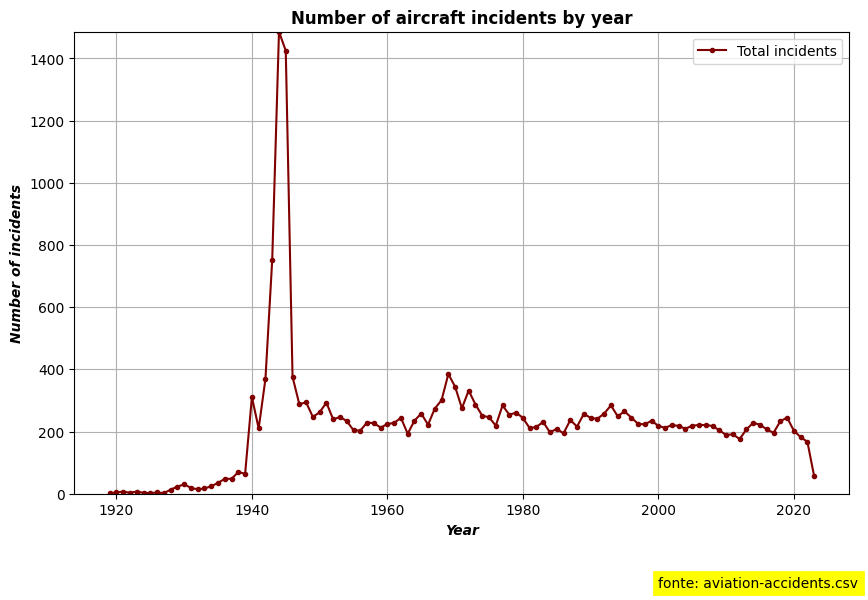

In [ ]:
df = data.copy()
df = df.dropna(subset=['date'])

incident_count_by_year = df.groupby('year').size()
max_value = incident_count_by_year.max()
plt.figure(figsize=(10, 6))
plt.plot(incident_count_by_year.index, incident_count_by_year.values,
         marker='o', markersize=3, linestyle='-', color='maroon', label='Total incidents')
plt.title('Number of aircraft incidents by year', fontweight='bold')
plt.xlabel('Year', fontweight='bold', fontstyle='italic')
plt.ylabel('Number of incidents', fontweight='bold', fontstyle='italic')
plt.grid(True)
plt.legend()
plt.ylim(0, max_value)
plt.text(2000, -300, "fonte: aviation-accidents.csv", size=10, bbox=dict(boxstyle="square,pad=0.3", lw=2, color='yellow'))
plt.show()
del df

In questo grafico, si nota come il numero di incidenti aerei ha avuto un picco anomalo durante la 2° guerra mondiale (specialmente tra il 1944 e il 1945) e un altro picco più piccolo attorno al 1970, per poi tenersi costante tra i 200 e i 300 incidenti annuali fino al 2020, anno di diffusione dell'epidemia mondiale di COVID e delle rispettive norme di limitazione agli spostamenti.

**N° di morti in incidenti aerei per anno**:

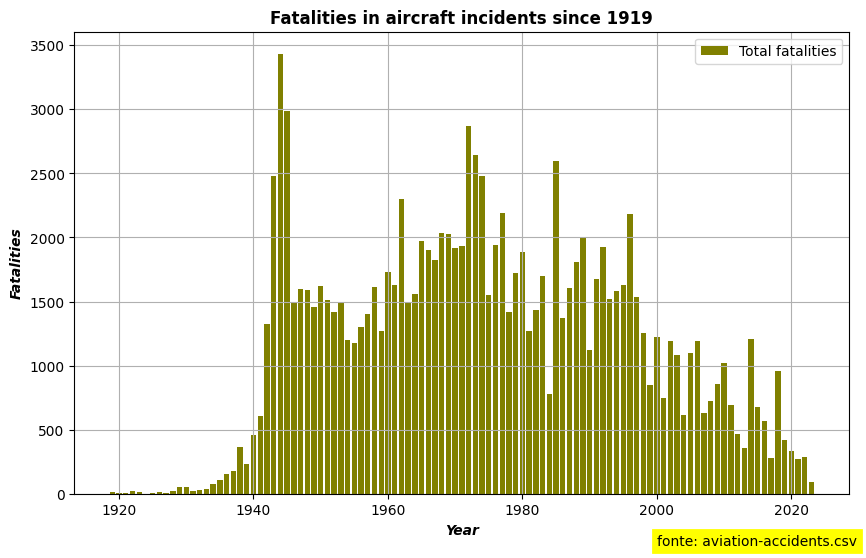

In [ ]:
df = data.copy()
df = df.dropna(subset=['date'])

fatalities_by_year = df.groupby('year')['fatalities'].sum()
plt.figure(figsize=(10, 6))
plt.bar(fatalities_by_year.index, fatalities_by_year.values,
        color='olive', label='Total fatalities')
plt.title('Fatalities in aircraft incidents since 1919',fontweight='bold')
plt.xlabel('Year',fontweight='bold',fontstyle='italic')
plt.ylabel('Fatalities',fontweight='bold',fontstyle='italic')
plt.grid(True)
plt.legend()
plt.text(2000, -400, "fonte: aviation-accidents.csv",size=10, bbox=dict(boxstyle="square,pad=0.3", lw=2,color='yellow'))
plt.show()
del df

In questo grafico invece si nota sempre un picco durante la 2° guerra mondiale, ma l'andamento delle morti annue risulta più irregolare di quello degli incidenti. <br/> Si può notare come dagli anni '90 ad oggi il numero di morti annue è andato a diminuire

**Comparazione tra n° di incidenti e n° di morti per anno:**

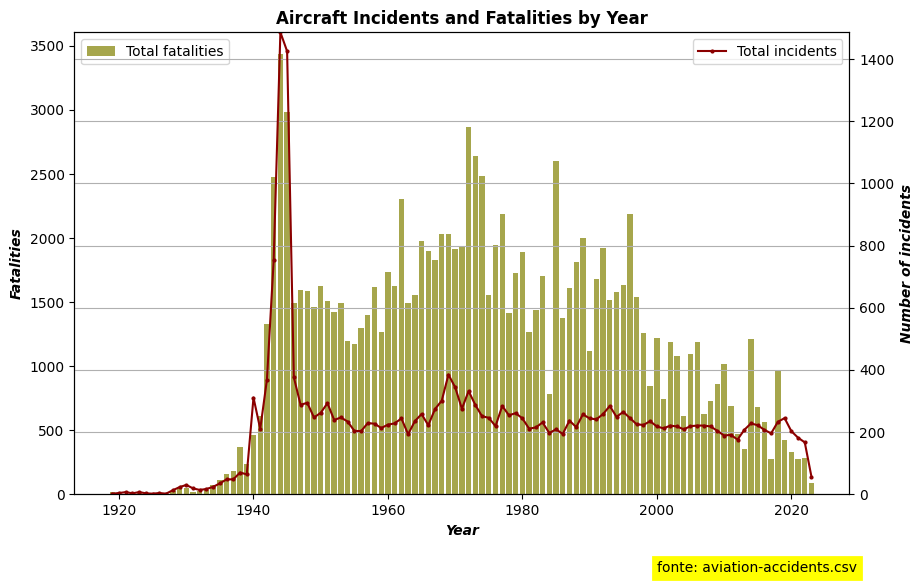

In [ ]:
df=data.copy()
df = df.dropna(subset=['date'])

fig, ax1 = plt.subplots(figsize=(10, 6))
fatalities_by_year = df.groupby('year')['fatalities'].sum()
ax1.bar(fatalities_by_year.index, fatalities_by_year.values,
        color='olive', alpha=0.7, label='Total fatalities')
ax1.tick_params('y', colors='black')
ax1.set_xlabel('Year',fontweight='bold',fontstyle='italic')
ax1.set_ylabel('Fatalities',fontweight='bold',fontstyle='italic')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
incident_count_by_year = df.groupby('year').size()
ax2.plot(incident_count_by_year.index, incident_count_by_year.values,
         marker='o', markersize=2, linestyle='-', color='darkred', label='Total incidents')
ax2.tick_params('y', colors='black')
ax2.set_ylabel('Number of incidents',fontweight='bold',fontstyle='italic')
ax2.legend(loc='upper right')
plt.ylim(0, max_value)
plt.title('Aircraft Incidents and Fatalities by Year',fontweight='bold')
plt.grid(True)
plt.text(2000, -250, "fonte: aviation-accidents.csv",size=10, bbox=dict(boxstyle="square,pad=0.3", lw=2,color='yellow'))
plt.show()
del df

In questo grafico che mette in relazione gli andamenti di incidenti e morti è interessante osservare come, nonostante il numero di incidenti aerei è andato a calare dagli anni '90, il numero delle morti si sia tenuto costante.

# Incidenti aerei prima e dopo l'11/09/2001

**Media annuale di incidenti aerei prima e dopo l'11/09/2001, per le prime 10 nazioni per n° di incidenti:**

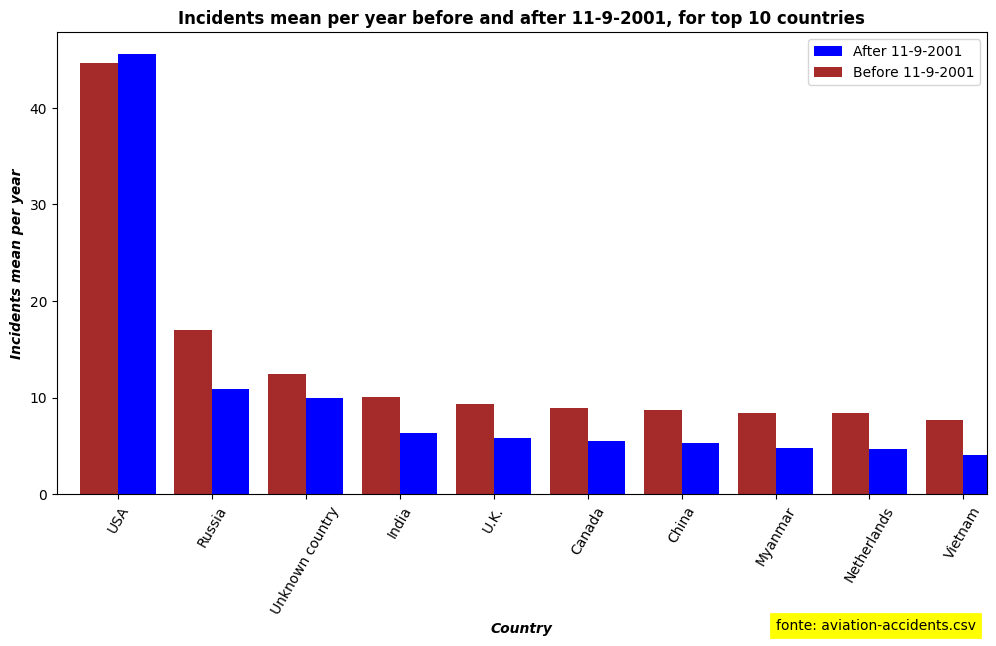

In [ ]:
df=data.copy()
df=df.dropna(subset=['date'])
incidents_before_911 = df[df['date'] < '2001-09-11']
incidents_after_911 = df[df['date'] >= '2001-09-11']

mean_incidents_before_911 = incidents_before_911.groupby(['country','year']).size().groupby('country').mean()
mean_incidents_after_911 = incidents_after_911.groupby(['country','year']).size().groupby('country').mean()
top_countries_before_911 = mean_incidents_before_911.sort_values(ascending=False).head(10)
top_countries_after_911 = mean_incidents_after_911.sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(12, 6))
top_countries_after_911.plot(kind='bar', ax=ax, color='blue', position=0, width=0.4, label='After 11-9-2001')
top_countries_before_911.plot(kind='bar', ax=ax, color='brown', position=1, width=0.4, label='Before 11-9-2001')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='center')
ax.set_ylabel('Incidents mean per year',fontstyle='italic',fontweight='bold')
ax.set_xlabel('Country',fontstyle='italic',fontweight='bold')
ax.set_title('Incidents mean per year before and after 11-9-2001, for top 10 countries',fontweight='bold')
ax.legend()
plt.text(7, -14, "fonte: aviation-accidents.csv",size=10, bbox=dict(boxstyle="square,pad=0.3", lw=2,color='yellow'))
plt.show()
del df

In questa grafico di comparazione salta all'occhio come gli USA siano l'unica nazione, tra le nazioni con più incidenti, in cui dopo l'11/09/2001 è aumentata la media annua di incidenti aerei

**Media annuale delle categorie di incidente prima e dopo l'11/09/2001:**

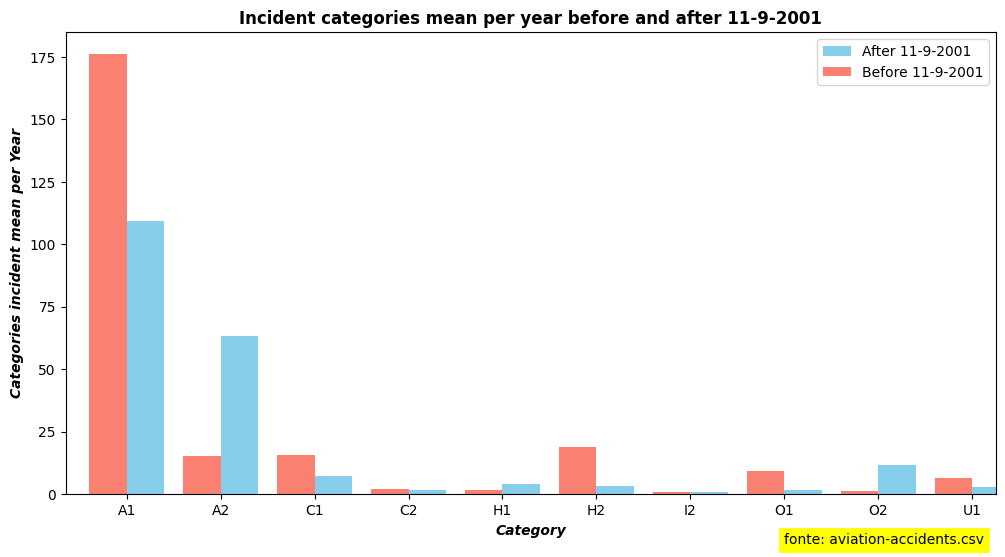

In [ ]:
df=data.copy()
df = df.dropna(subset=['date'])
incidents_before_911 = df[df['date'] < '2001-09-11']
incidents_after_911 = df[df['date'] >= '2001-09-11']

mean_incidents_by_category_before_911 = incidents_before_911.groupby(['cat', 'year']).size().groupby('cat').mean()
mean_incidents_by_category_after_911 = incidents_after_911.groupby(['cat', 'year']).size().groupby('cat').mean()
categories_before_911 = mean_incidents_by_category_before_911.sort_index(ascending=True)
categories_after_911 = mean_incidents_by_category_after_911.sort_index(ascending=True)
fig, ax = plt.subplots(figsize=(12, 6))
categories_after_911.plot(kind='bar', ax=ax, color='skyblue', position=0, width=0.4, label='After 11-9-2001')
categories_before_911.plot(kind='bar', ax=ax, color='salmon', position=1, width=0.4, label='Before 11-9-2001')
ax.set_ylabel('Categories incident mean per Year',fontweight='bold',fontstyle='italic')
ax.set_xlabel('Category',fontweight='bold',fontstyle='italic')
ax.set_title('Incident categories mean per year before and after 11-9-2001',fontweight='bold')
ax.legend()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
plt.text(7, -20, "fonte: aviation-accidents.csv",size=10, bbox=dict(boxstyle="square,pad=0.3", lw=2,color='yellow'))
plt.show()
del df

In questo grafico si notano parecchie differenze nelle medie tra prima e dopo l'11/09/2001:<br/> riguardo alle due categorie di incidente più diffuse, la media annua della categoria A1 è diminuita notevolmente, mentre invece è aumentata di molto la media annua della categoria A2.

# Mappa del n° di incidenti per nazione

In [ ]:
import geopandas as gpd
df=data.copy()
print(df['country'].unique())

['Unknown country' 'Russia' 'Eritrea' 'Libya' 'Poland' '?' 'India'
 'Bulgaria' 'Bahamas' 'Zimbabwe' 'Mauritania' 'Cyprus' 'Mexico'
 'New Caledonia' 'Honduras' 'Peru' 'Kenya' 'Antarctica' 'Latvia' 'Yemen'
 'Ukraine' 'France' 'Liberia' 'Italy' 'U.K.' 'South Africa' 'Sudan'
 'Sweden' 'Cuba' 'Belgium' 'China' 'Atlantic Ocean' 'Netherlands'
 'Germany' 'USA' 'Iran' 'Chile' 'Israel' 'Argentina' 'P.N. Guinea'
 'Nicaragua' 'Czech Rep.' 'Dominican Rep.' 'Brazil' 'Mediterranean Sea'
 'Indonesia' 'Egypt' 'Bolivia' 'Spain' 'Australia' 'Iraq' 'Guatemala'
 'Malta' 'Colombia' 'Switzerland' 'Austria' 'Uganda' 'Trinidad & Tobago'
 'Norway' 'Greece' 'Algeria' 'Pakistan' 'Panama' 'Romania' 'Morocco'
 'Pacific Ocean' 'Hungary' 'Jamaica' 'Japan' 'Canada' 'Gambia' 'Thailand'
 'Philippines' 'Ecuador' 'Puerto Rico' 'Venezuela' 'Mozambique'
 'Singapore' 'Myanmar' 'Djibouti' 'Gibraltar' 'Costa Rica' 'Indian Ocean'
 'Denmark' 'Finland' 'Estonia' 'Vietnam' 'Tanzania' 'Iceland' 'Benin'
 'Portugal' 'Uzbekistan' 'Eth

<ipython-input-28-7d4e7dfe45c9>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


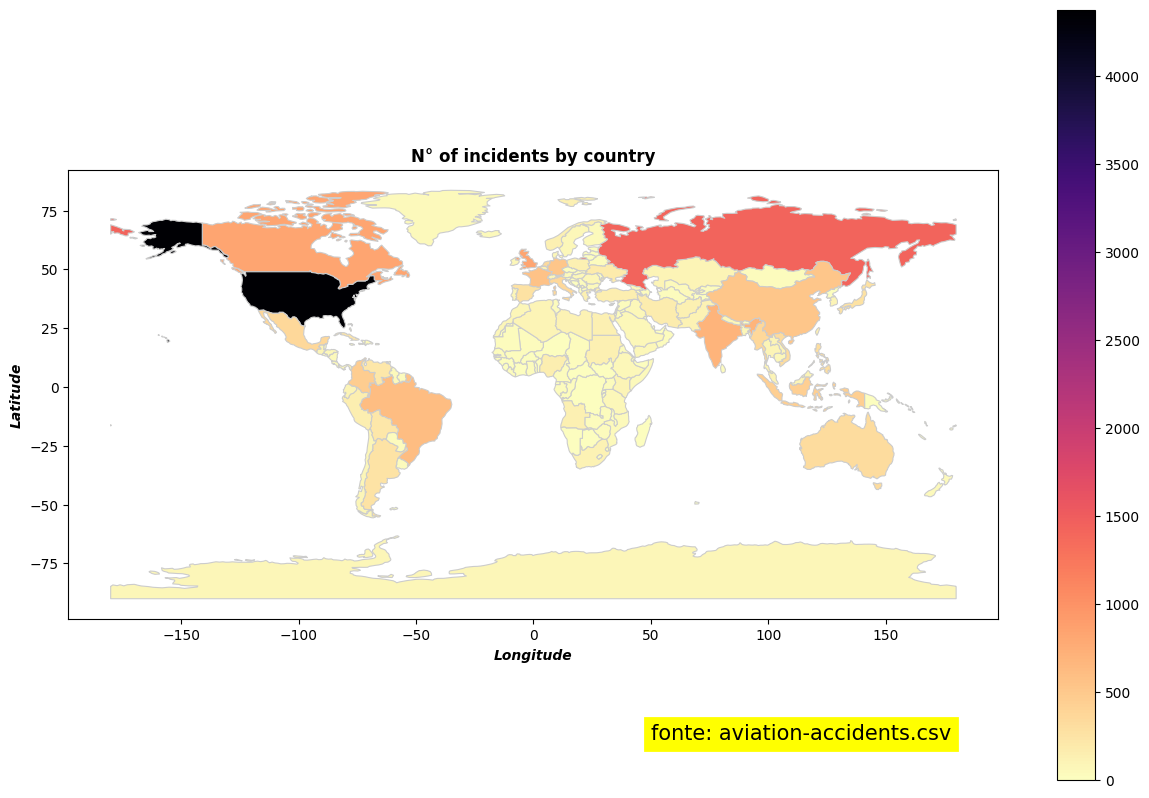

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
name_mapping = {
    'USA': 'United States of America',
    'U.K.': 'United Kingdom'
}
df['country'] = df['country'].replace(name_mapping)
merged_data = world.merge(df.groupby('country').size().reset_index(name='incident_count'), how='left', left_on='name', right_on='country')
merged_data['incident_count'] = merged_data['incident_count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='incident_count', cmap='magma_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('N° of incidents by country',fontweight='bold')
plt.xlabel('Longitude',fontweight='bold',fontstyle='italic')
plt.ylabel('Latitude',fontweight='bold',fontstyle='italic')
plt.text(50, -150, "fonte: aviation-accidents.csv",size=15, bbox=dict(boxstyle="square,pad=0.3", lw=2,color='yellow'))
plt.show()
del df

In questo cartogramma, risalta subito all'occhio come negli USA c'è un numero di incidenti aerei molto più elevato che nel resto del mondo. <br/> Tutti i paesi con delle dimensioni rilevanti (Russia, Canada, Brasile, India, Cina, Australia) sono abbastanza colpiti da incidenti aerei.<br/> Dalla mappa si evince anche come i paesi africani siano invece poco colpiti  dagli incidenti.